# Classification on the breast_cancer dataset using Principal Component

# Librairies & Data

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [7]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df)

StandardScaler()

In [11]:
scaled_df = scaler.transform(df)

# Principal Component Analysis

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_df)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_df)

In [16]:
scaled_df.shape

(569, 30)

In [17]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

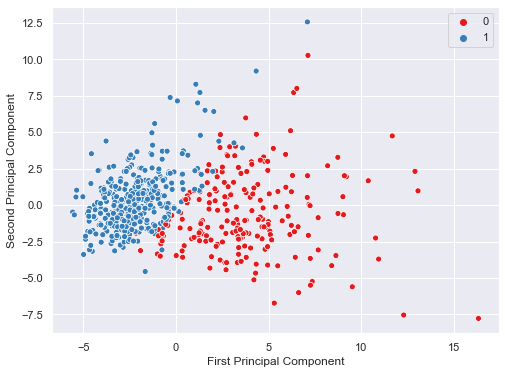

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=cancer['target'],palette='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Notes on PCA

** Components are difficult to interpret **

In [19]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

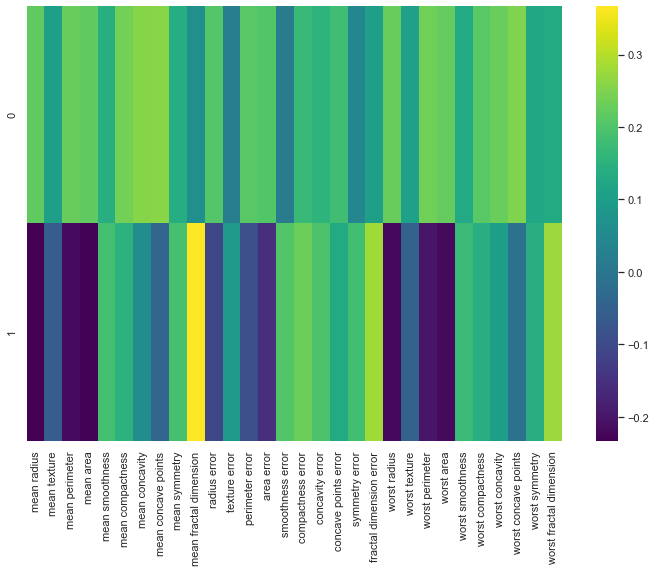

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp,cmap='viridis')

<Figure size 864x576 with 0 Axes>

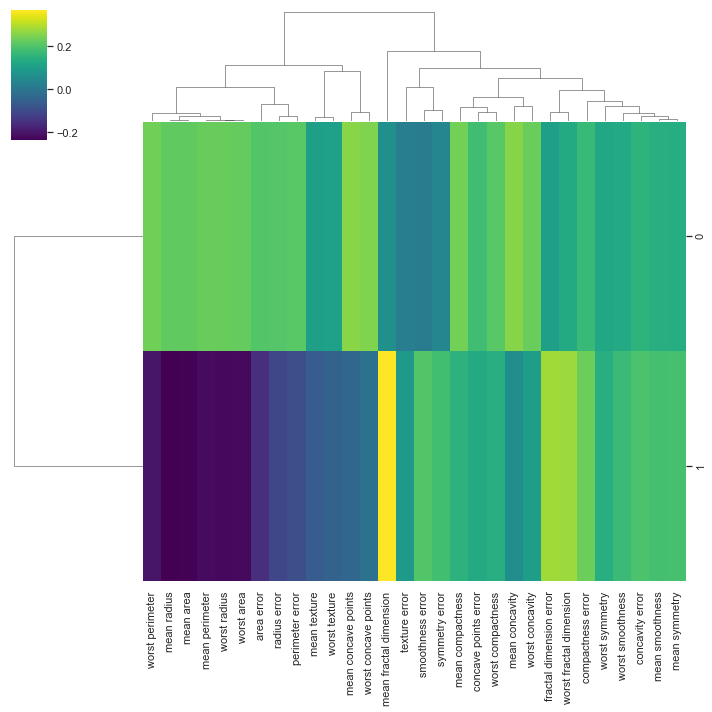

In [21]:
plt.figure(figsize=(12,8))
sns.clustermap(df_comp,cmap='viridis')

# Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
x= x_pca
y= cancer['target']
X_train,X_test_scaled_reduced,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# Support Vectors Machines

**Importing SVC from sklearn & fitting the model**

In [246]:
from sklearn.svm import SVC
svm_model = SVC (kernel='rbf',C=1.5, gamma=0.3)
svm_model.fit(X_train,Y_train)
classify = svm_model.fit(X_test_scaled_reduced, Y_test)

** #The next part of the code, which is showing a figure with the support vectors is not from myself, but from medium on the same dataset & the sci-kit learn documentation. I founded this very interesting to plot the support vectors, and also try differents tuning parameters with the SVC (using different C & gamma values) and observe the effects directly on the graph and not only on accuracy/confusion matrix **

initial decision function shape;  (33043,)
after reshape:  (173, 191)


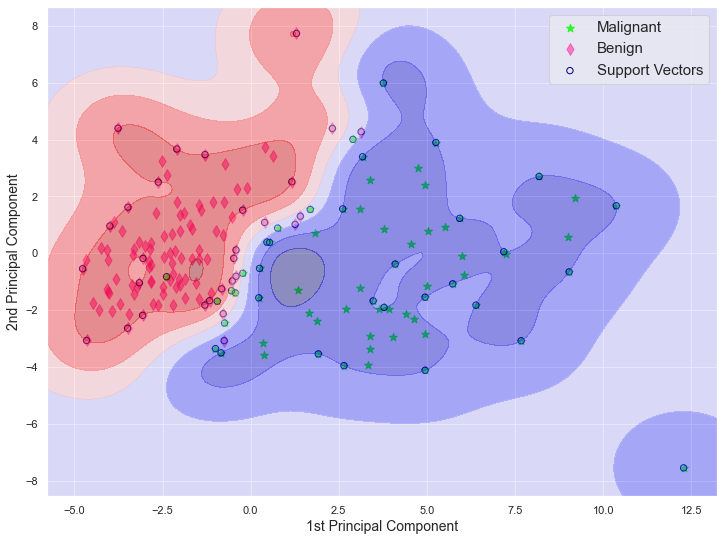

In [265]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    print ('initial decision function shape; ', np.shape(Z))
    Z = Z.reshape(xx.shape)
    print ('after reshape: ', np.shape(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
                      
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = Y_test.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'Malignant',1:'Benign'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=40, facecolors='none', 
           edgecolors='navy', label='Support Vectors')

plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)

#plt.savefig('ClassifyMalignant_Benign2D_Decs_FunctG10.png', dpi=300)
plt.show()

In [262]:
predictions = svm_model.predict(X_test_scaled_reduced)
from sklearn.metrics import confusion_matrix, classification_report

In [263]:
print (confusion_matrix(Y_test,predictions))

[[ 62   4]
 [  4 101]]


In [264]:
print (classification_report(Y_test,predictions))

precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.96      0.96      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# Logistic Regression

In [271]:
#Fitting a logistic regression and getting the report
import statsmodels.api as sm
reg_log = sm.Logit(y_train,x_train)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.114363
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  398
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Sep 2020   Pseudo R-squ.:                  0.8260
Time:                        21:11:25   Log-Likelihood:                -45.517
converged:                       True   LL-Null:                       -261.59
Covariance Type:            nonrobust   LLR p-value:                 5.568e-96
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2664      0.321     -7.064      0.000      -2.895      -1.638
x2             1.2761      0.214      5.969      0.000       0.857       1.695
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<AxesSubplot:>

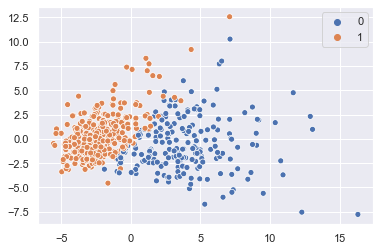

In [253]:
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=cancer['target'])

**The original code for the logit confusion matrice is from a lesson I've taken on the logistic regression.**

In [254]:
def logit_confusion_matrix(data,actual_values,model):
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [273]:
cm = logit_confusion_matrix(x_test,y_test,results_log)
cm

(array([[65.,  1.],
        [ 7., 98.]]),
 0.9532163742690059)

In [266]:
# Compare with the SVM Confusion Matrix
print (confusion_matrix(y_test,predictions))

[[ 62   4]
 [  4 101]]


** Logistic Regression is slightly more accurate and fit better the dataset, with 95% accuracy vs 91% for the SVC. We could maybe optimize the SVC with a gridsearch and get a better score. **

In [267]:
#Without PCA

x2 = scaled_df
y2 = cancer['target']
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=101)

#Logistic Regression with 30 variables
reg_log2 = sm.Logit(y,scaled_df)
results_log2 = reg_log2.fit()
results_log2.summary()

In [269]:
#SVM Classification with 30 variables
model = SVC ()
model.fit(x_train2,y_train2)
predictions2 = model.predict(x_test2)
print (classification_report(y_test2,predictions2))
print (confusion_matrix(y_test2,predictions2))

SVC()

*Conclusion*

** We can see that without PCA, both the Support Vectors Classifier and Logistic Regression gives more accuracy (98%). However, we need thirty variables to get 98%, and only two to get 91% (SVC) to 95% (Logistic) precision. So for me, PCA is *despite with a light lack of accuracy it provides compared to the original dataset* more useful and powerful to work with this kind of dataset, because we can get a good accuracy with only 2 variables and explain most of the variance. **